In [2]:
# Import required modules.
import pandas as pd
import pickle
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Q1. Install MLflow

To get started with MLflow you'll need to install the MLflow Python package.

For this we recommend creating a separate Python environment, for example, you can use [conda environments](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-envs), and then install the package there with `pip` or `conda`.

Once you installed the package, run the command `mlflow --version` and check the output.

What's the version that you have?

In [3]:
# Check mflow version.
mlflow.__version__

'2.13.0'

## Q2. Download and preprocess the data

We'll use the Green Taxi Trip Records dataset to predict the duration of each trip. 

Download the data for January, February and March 2023 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Use the script `preprocess_data.py` located in the folder [`homework`](homework) to preprocess the data.

The script will:

* load the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data),
* fit a `DictVectorizer` on the training set (January 2023 data),
* save the preprocessed datasets and the `DictVectorizer` to disk.

Your task is to download the datasets and then execute this command:

```
python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output
```

Tip: go to `02-experiment-tracking/homework/` folder before executing the command and change the value of `<TAXI_DATA_FOLDER>` to the location where you saved the data.

How many files were saved to `OUTPUT_FOLDER`?

python preprocess_data.py --raw_data_path TAXI_DATA_FOLDER --dest_path ./OUTPUT_FOLDER

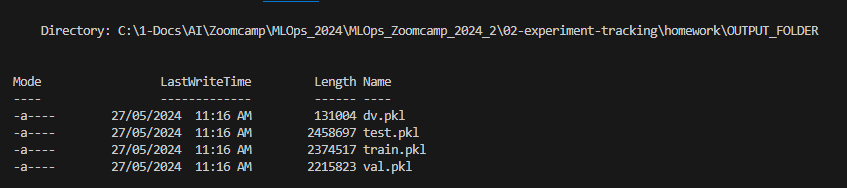

## Q3. Train a model with autolog

We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder `homework`. 

The script will:

* load the datasets produced by the previous step,
* train the model on the training set,
* calculate the RMSE score on the validation set.

Your task is to modify the script to enable **autologging** with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked. 

Tip 1: don't forget to wrap the training code with a `with mlflow.start_run():` statement as we showed in the videos.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

What is the value of the `min_samples_split` parameter?

python train.py

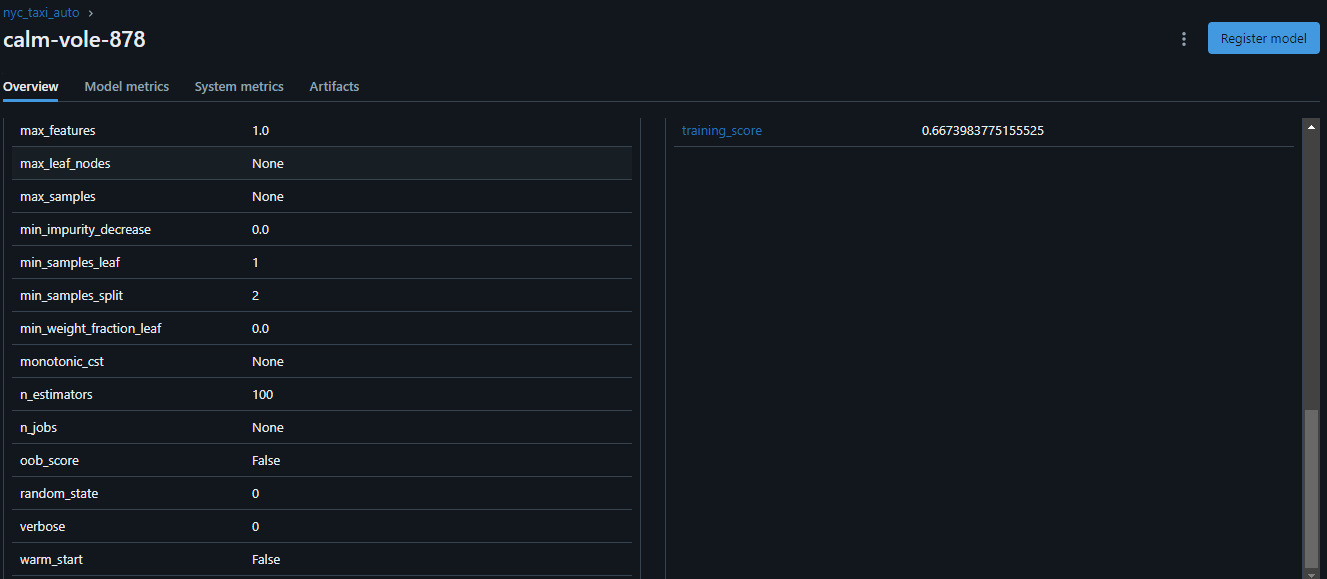

## Q4. Launch the tracking server locally

Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry. 

Your task is to:

* launch the tracking server on your local machine,
* select a SQLite db for the backend store and a folder called `artifacts` for the artifacts store.

You should keep the tracking server running to work on the next two exercises that use the server.

In addition to `backend-store-uri`, what else do you need to pass to properly configure the server?

default-artifact-root

## Q5. Tune model hyperparameters
Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `hyperopt`. 
We have prepared the script `hpo.py` for this exercise. 

Your task is to modify the script `hpo.py` and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the `objective` function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called `random-forest-hyperopt` to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

* the list of hyperparameters that are passed to the `objective` function during the optimization,
* the RMSE obtained on the validation set (February 2023 data).

What's the best validation RMSE that you got?

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `hyperopt`. 
We have prepared the script `hpo.py` for this exercise. 

Your task is to modify the script `hpo.py` and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the `objective` function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called `random-forest-hyperopt` to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

* the list of hyperparameters that are passed to the `objective` function during the optimization,
* the RMSE obtained on the validation set (February 2023 data).

What's the best validation RMSE that you got?

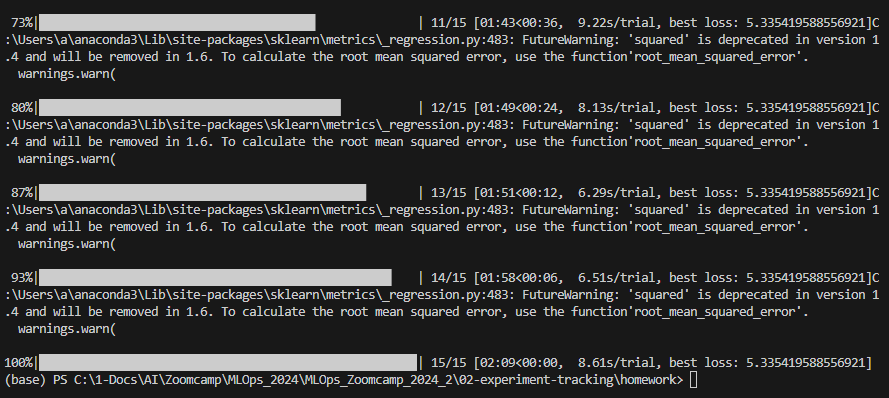

## Q6. Promote the best model to the model registry

The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. 
In this exercise, you'll promote the best model to the model registry. We have prepared a script called `register_model.py`, which will check the results from the previous step and select the top 5 runs. 
After that, it will calculate the RMSE of those models on the test set (March 2023 data) and save the results to a new experiment called `random-forest-best-models`.

Your task is to update the script `register_model.py` so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tip 1: you can use the method `search_runs` from the `MlflowClient` to get the model with the lowest RMSE,

Tip 2: to register the model you can use the method `mlflow.register_model` and you will need to pass the right `model_uri` in the form of a string that looks like this: `"runs:/<RUN_ID>/model"`, and the name of the model (make sure to choose a good one!).

What is the test RMSE of the best model?

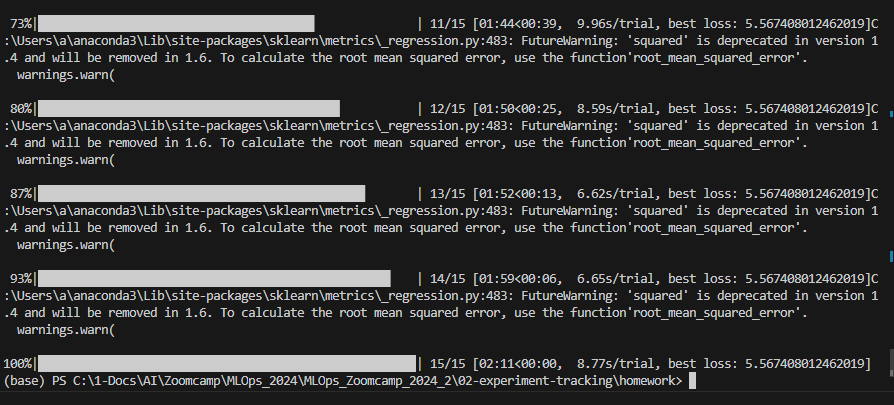

In [3]:
import os
import pickle
import click
import mlflow
import numpy as np
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll import scope
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType

In [4]:

MLFLOW_TRACKING_URI = "sqlite:///nyc_green_taxi.db"
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)
client.search_experiments()

[<Experiment: artifact_location='file:///C:/1-Docs/AI/Zoomcamp/MLOps_2024/MLOps_Zoomcamp_2024_2/02-experiment-tracking/homework/ARTIFACTS_LOCAL/3', creation_time=1717022830077, experiment_id='3', last_update_time=1717022830077, lifecycle_stage='active', name='random-forest-best-models', tags={}>,
 <Experiment: artifact_location='file:///C:/1-Docs/AI/Zoomcamp/MLOps_2024/MLOps_Zoomcamp_2024_2/02-experiment-tracking/homework/ARTIFACTS_LOCAL/2', creation_time=1716852351794, experiment_id='2', last_update_time=1716931894578, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>,
 <Experiment: artifact_location='file:///C:/1-Docs/AI/Zoomcamp/MLOps_2024/MLOps_Zoomcamp_2024_2/02-experiment-tracking/homework/mlruns/1', creation_time=1716842304145, experiment_id='1', last_update_time=1716842304145, lifecycle_stage='active', name='nyc_taxi_auto', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1716837296325, experiment_id='0', last_update_time=1716837296

In [7]:
exp_id = '3'
the_runs = client.search_runs(experiment_ids=exp_id)

In [11]:
experiment = client.get_experiment_by_name("random-forest-best-models")
experiment

<Experiment: artifact_location='file:///C:/1-Docs/AI/Zoomcamp/MLOps_2024/MLOps_Zoomcamp_2024_2/02-experiment-tracking/homework/ARTIFACTS_LOCAL/3', creation_time=1717022830077, experiment_id='3', last_update_time=1717022830077, lifecycle_stage='active', name='random-forest-best-models', tags={}>

In [13]:
experiment.experiment_id

'3'

In [8]:
the_runs[0]

<Run: data=<RunData: metrics={'RMSE': 5.5921322796760755}, params={'hyper-parameters': "{'max_depth': 20, 'min_samples_leaf': 1, "
                     "'min_samples_split': 9, 'n_estimators': 19, "
                     "'random_state': 42}"}, tags={'mlflow.runName': 'adaptable-swan-44',
 'mlflow.source.git.commit': '64239eb01331a0395e3ff1190d6dc2606b2db352',
 'mlflow.source.name': 'hpr.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'a'}>, info=<RunInfo: artifact_uri='file:///C:/1-Docs/AI/Zoomcamp/MLOps_2024/MLOps_Zoomcamp_2024_2/02-experiment-tracking/homework/ARTIFACTS_LOCAL/3/6d9fb90fec624385b71269c19ea8ab1a/artifacts', end_time=1717022956233, experiment_id='3', lifecycle_stage='active', run_id='6d9fb90fec624385b71269c19ea8ab1a', run_name='adaptable-swan-44', run_uuid='6d9fb90fec624385b71269c19ea8ab1a', start_time=1717022945917, status='FINISHED', user_id='a'>, inputs=<RunInputs: dataset_inputs=[]>>

In [ ]:
exp_id = '3'
filt_str="metrics.RMSE < 5.6"
run_view=ViewType.ACTIVE_ONLY
max_res=5
ord_by=["metrics.RMSE ASC"]

In [38]:
runs = client.search_runs(
    experiment_ids=exp_id,
    filter_string=filt_str,
    run_view_type=run_view,
    max_results=max_res,
    order_by=ord_by
)

In [39]:
for run in runs:
    print(f"the_name: {run.info.run_name}, the_id: {run.info.run_id}, the_rmse: {run.data.metrics['RMSE']:.4f}")   

the_name: aged-foal-323, the_id: ea37a3668f5943fdb77dcfb093da4f30, the_rmse: 5.5674
the_name: sassy-mare-710, the_id: a4e3654a58be4902bb2fbfd50ff5b67f, the_rmse: 5.5853
the_name: funny-smelt-946, the_id: 45b09334c3d04e54b2420be9050a3083, the_rmse: 5.5895
the_name: bittersweet-calf-768, the_id: 06f8fa11b37b45b78c31213afea6994d, the_rmse: 5.5921
the_name: indecisive-tern-598, the_id: 00ea82f9e04b452983f5da08f87f3652, the_rmse: 5.5942


In [45]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
model_uri = f"runs:/{runs[0].info.run_id}/model"
model_name = runs[0].info.run_name

In [46]:
mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'model_name'.
Created version '1' of model 'model_name'.


<ModelVersion: aliases=[], creation_timestamp=1717017270611, current_stage='None', description=None, last_updated_timestamp=1717017270611, name='model_name', run_id='ea37a3668f5943fdb77dcfb093da4f30', run_link=None, source='file:///C:/1-Docs/AI/Zoomcamp/MLOps_2024/MLOps_Zoomcamp_2024_2/02-experiment-tracking/homework/ARTIFACTS_LOCAL/3/ea37a3668f5943fdb77dcfb093da4f30/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>